## Import packages and define preliminary functions

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

In [3]:
def visualize_t(t_stat, n_control, n_experimental):
    
    """
    Visualize the critical t values on a t distribution
    
    Parameters
    -----------
    t-stat: float
    n_control: int
    n_experiment: int
    
    Returns
    ----------
    None
    
    """
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.ppf to get critical value. For alpha = 0.05 and two tailed test
    crit = stats.t.ppf(1-0.025, (n_control+n_experimental-2))
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(crit, color='black', linestyle='--', lw=5)
    ax.axvline(-crit, color='black', linestyle='--', lw=5)
    ax.axvline(t_stat, color='red', linestyle='--', lw=5,label='t-statistic')
    
    plt.legend()
    
    plt.show()
    return None


In [4]:
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

In [5]:
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom


In [6]:
df = pd.read_csv('reviews.csv') # Read in data using joined dataset pulled from sqlite db

In [7]:
df = df.drop_duplicates(subset = 'reviewid', keep = 'last') # drop duplicate review ids to have only one unique album review for each idea.
#This does elminate albums with multiple genres but I did not know how to perserve this


---


# Comparing Album Reviews between Pop/R&B and Electronic genres. Does genre have an effect on reviews?

In [8]:
df.groupby('genre')['score'].count()

genre
electronic      1994
experimental     565
folk/country     567
global           127
jazz             287
metal            384
pop/r&b         1174
rap             1491
rock            9435
Name: score, dtype: int64

### Plot count of album reviews by genre 

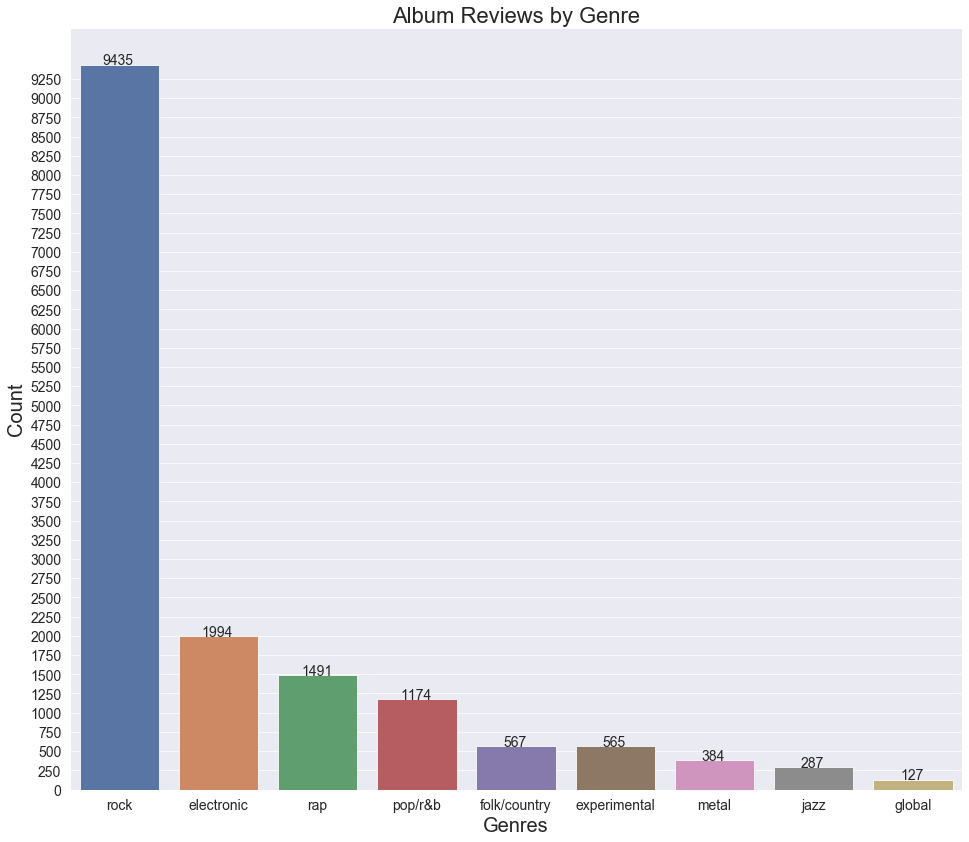

In [70]:
sns.set(rc={"axes.labelsize":10})
sns.set_context('paper')
fig = plt.figure(figsize = (16,14))
ax = sns.countplot(x='genre', data=df, order = df['genre'].value_counts().index,)

    
plt.yticks(np.arange(0, 9500 , 250), size =14)
plt.xticks(size =14)
plt.xlabel('Genres', size = 20)
plt.ylabel('Count',  size = 20)
ax.set_title('Album Reviews by Genre', size =22)

x_offset = -.01
y_offset = 0.12
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), ha="center", fontsize=14)
plt.savefig('genre_count')
plt.show()



In [10]:
df['score'].mean()

7.00571537332096

In [11]:
df_genre_mean = df.groupby('genre').mean()

In [12]:
df_genre_mean= df_genre_mean.sort_values(by='score', ascending = False)

### Plot count of average review score by genre 

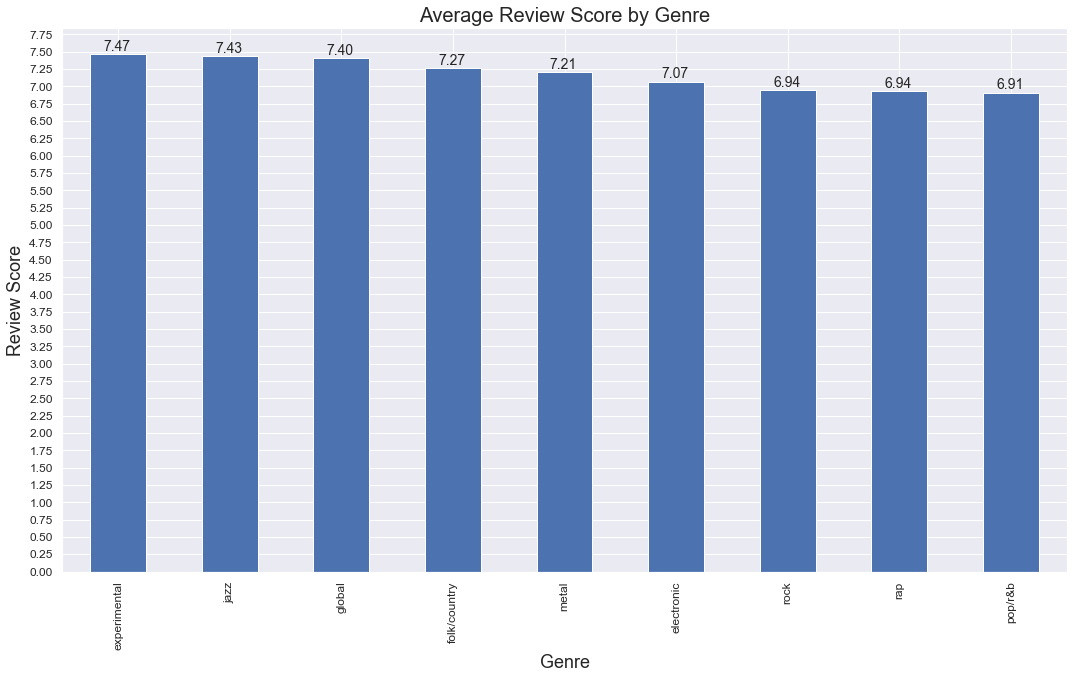

In [69]:
sns.set()
graph = df_genre_mean.plot( y = ['score'], kind = 'bar', figsize = (18,10), stacked =True, legend = False)
graph.set_xlabel('Genre', size = 18)

graph.set_yticks(np.arange(0, 8 , .25))

graph.set_ylabel('Review Score', size =18)
plt.xticks(size =12)
plt.yticks(size = 12)
graph.set_title('Average Review Score by Genre', size =20)

x_offset = -.01
y_offset = 0.05
for p in graph.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    graph.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), ha="center", fontsize=14)
#plt.savefig('average_score')
plt.show()

In [14]:
df_pop = df[df['genre'] == 'pop/r&b']
df_electronic = df[df['genre'] == 'electronic']
# set up dataframes using selections on genre column to choose our two genres

### Sample electronic genre df down to the same sample size as pop/r&b for comparison

In [15]:
df_electronic = df_electronic.sample(n=1174)

### Calculate means, counts, and std for both genres

In [16]:
pop_mean = df_pop['score'].mean() 
pop_count= df_pop['score'].count() 
pop_std= df_pop['score'].std() 

electronic_mean = df_electronic['score'].mean() 
electronic_count = df_electronic['score'].count() 
electronic_std = df_electronic['score'].std() 

### The review score mean for the Pop/R&B genre is 6.911 which is less than the  review score mean of the Electronic genre (7.059)

In [17]:
pop_mean

6.911073253833052

In [18]:
electronic_mean

7.0901192504258965

In [19]:
pop_count

1174

In [20]:
electronic_count 

1174

### Plotting the two distributions shows that Electronic has a higher mean but also has more reviews concentrated above 8.0. We will now perform statistical tests to determine the statistical significance of this difference

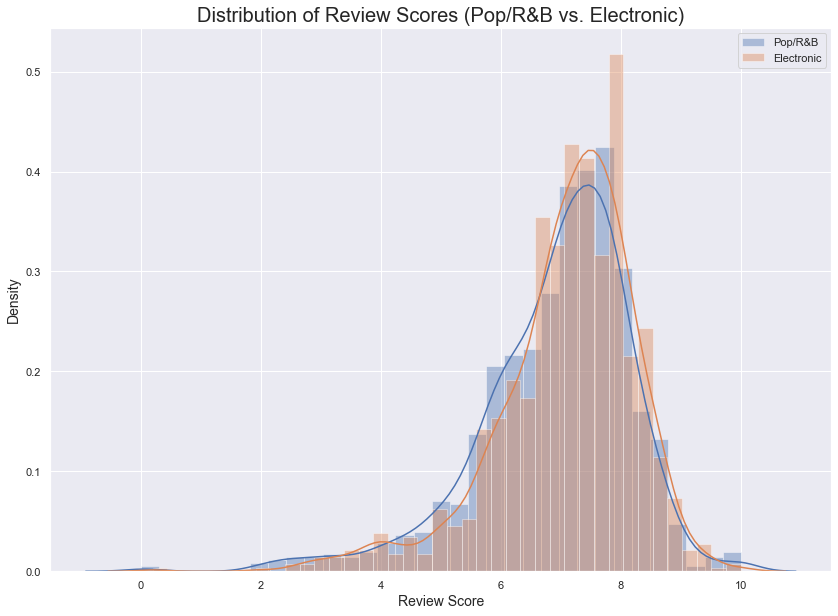

In [68]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(14,10)})
sns.distplot(df_pop['score'], label = 'Pop/R&B') 
sns.distplot(df_electronic['score'], label = 'Electronic') 
plt.xlabel('Review Score', size =14)
plt.ylabel('Density', size =14)
plt.title('Distribution of Review Scores (Pop/R&B vs. Electronic)', size =20)
plt.legend()
#plt.savefig('popvselectronic')
plt.show()

### QQ plots to determine normality of distributions


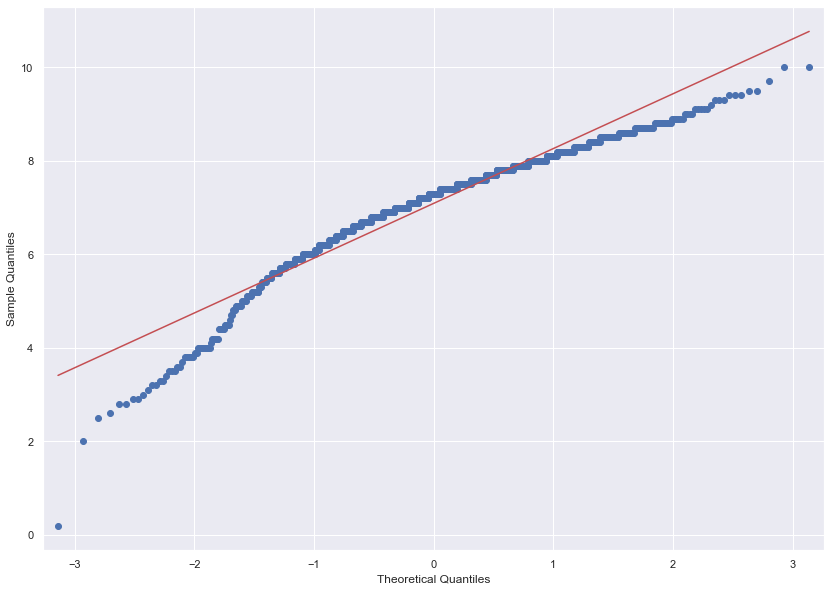

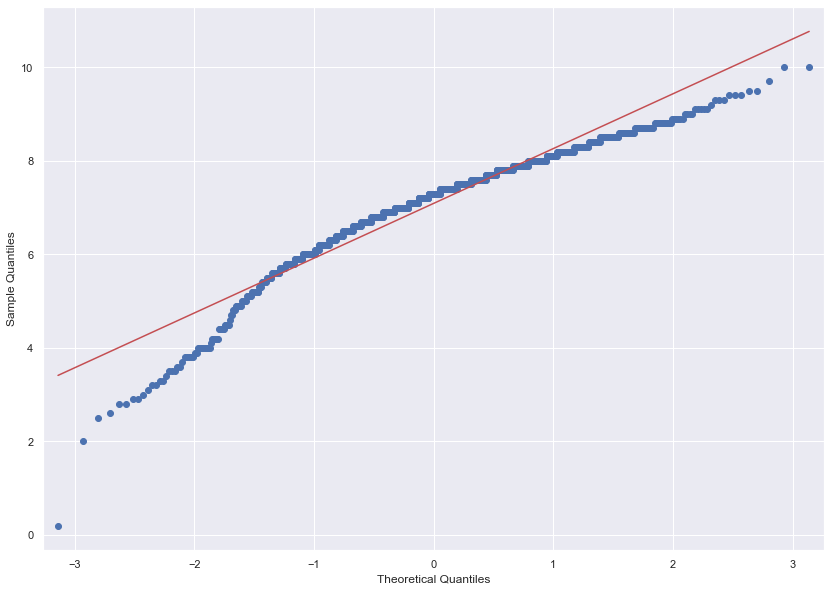

In [22]:
sm.qqplot(df_electronic['score'], line = 's')

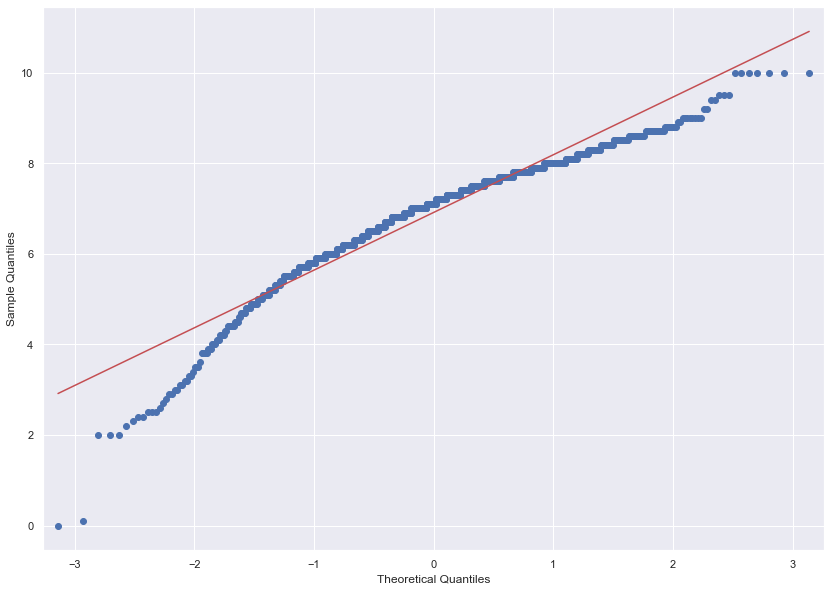

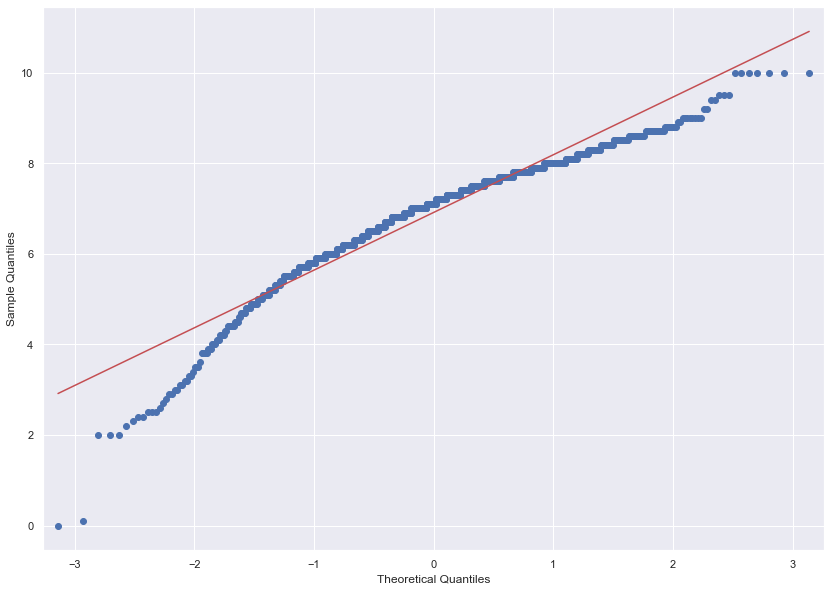

In [23]:
sm.qqplot(df_pop['score'], line = 's')

## Statistical Testing

### Calculation and plotting of t-statistic of the Review Scores of Pop/R&B vs Electronic music

In [24]:
t_stat_genre = twosample_tstatistic(df_pop['score'], df_electronic['score'] )
t_stat_genre

-3.5427995363663336

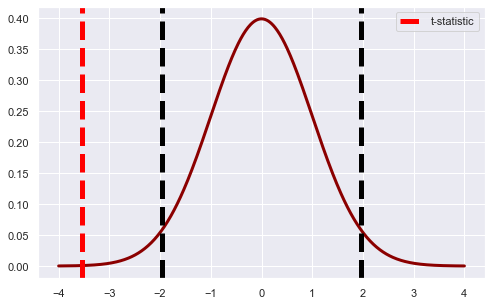

In [25]:
visualize_t(t_stat_genre, len(df_pop['score']), len(df_electronic['score']))

### Welch's T - test of two samples that have unequal variance using alpha of 0.05

In [26]:
# independent two sample t test assuming normal distributions
stats.ttest_ind(df_pop['score'], df_electronic['score'], equal_var = False)

Ttest_indResult(statistic=-3.5427995363663336, pvalue=0.00040368495817403563)

### Wilcoxon Rank Sums Test between 2 skewed distributions using alpha of 0.05

In [27]:
#Wilcoxon Rank Sums test on 2 skewed distributions
stats.ranksums(df_pop['score'], df_electronic['score'])

RanksumsResult(statistic=-3.625183244928104, pvalue=0.00028875662942219225)

### Kolmogorov-Smirnov statistic on 2 samples. This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution. Using alpha of 0.05

In [28]:
# Kolmogorov-Smirnov statistic on 2 samples.
#This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.
stats.ks_2samp(df_pop['score'], df_electronic['score'])

Ks_2sampResult(statistic=0.0706984667802385, pvalue=0.005643679789445465)

## For the first two statistical tests, the p - value is less than the value of 0.025 for a two tailed test and we are able to reject the null hypothesis that the two samples are the same

## Pop/R&B albums are reviewed less favorably than Electronic albums

---

# Comparing Album Reviews from the label with the most reviews against all others (Sub Pop vs. all)

In [31]:
df_label = df.copy()
df_subpop = df[df['label'] == 'sub pop']

In [32]:
subpop_mean = df_subpop['score'].mean() 
subpop_count= df_subpop['score'].count() 
subpop_std= df_subpop['score'].std() 


In [33]:
df_label.score.count()

18389

In [34]:
subpop_mean 

7.106818181818179

In [35]:
subpop_count

264

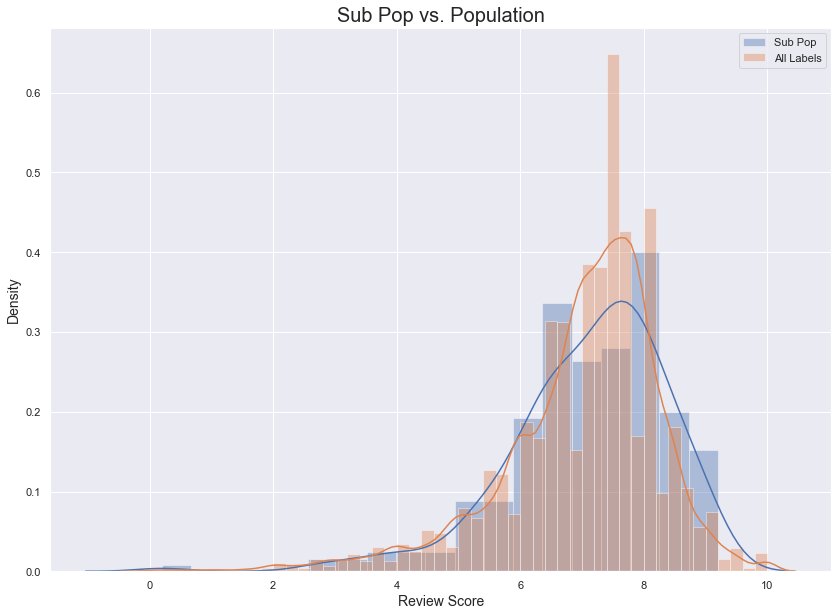

In [67]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(14,10)})
sns.distplot(df_subpop['score'], label = 'Sub Pop') 
sns.distplot(df_label['score'], label = 'All Labels') 
plt.xlabel('Review Score', size =14)
plt.ylabel('Density', size =14)
plt.title('Sub Pop vs. Population', size =20)

plt.legend()
#plt.savefig('subpop')
plt.show()

### Run two tailed z-test  for Sub Pop reviews against whole population of all labels

In [37]:
def z_stat(x_bar, mu, sigma, n, alpha):
    z = (x_bar - mu)/(sigma/(n**(1/2)))
    
    pval = (1 -(stats.norm.cdf(z)))
    print(f"P Value: {pval}")
    if pval<(alpha/2):
        print("Reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")
    

In [38]:
z_stat(subpop_mean, df_label.score.mean(), df_label.score.mean(), subpop_count, 0.05) # We use two tailed z-test to test if the sample is different than the population 

P Value: 0.4073047354604893
We fail to reject the null hypothesis


### In this case, we fail to reject the null hypothesis that reviews for Sub Pop albums are statistically different than that of the population. We will now proceed with testing each label individually against the population

# Comparing Album Reviews for each label against the population. Does label have an effect on reviews?

In [39]:
df_label2 = df_label.copy()
df_label2['sz'] = df_label.groupby(['label'])['score'].transform("size")



In [40]:
df_label2 = df_label2[df_label2['sz']>40]

### We will not test labels that have less than 40 albums against the populations but we will still keep those albums in the greater population

In [41]:
df_label2['score'].mean() #mean of all labels with more than 40 albums 

7.003130730940574

In [42]:
df_label2['score'].std() #mean of all labels with more than 40 albums 

1.3418329060250742

### We remove albums on the label "self-released" as these albums are all listed in one group yet are not related 

In [43]:
df_label2 = df_label2[df_label2['label']!= 'self-released' ]

In [44]:
labels = list(set(list(df_label2['label'])))

### Set up of function to conduct 2 tailed z test of each sample containing labels of more than 40 reviews against the population

In [45]:
def calculate_z(df, alpha):
    sig_labels = []
    pop_mean = df.score.mean()
    pop_std = df.score.std()
    
    print(f"Population Mean: {pop_mean}")
    print(f"Population Standard Deviation: {pop_std} \n")
    for label in labels:
        
        data = df[df['label'] == label]
        mean = data['score'].mean() 
        count = data['score'].count() 
        std= data['score'].std() 
        
        print(f"Label: {label}")
        print(f"Number of Albums: {count}")
        print(f"Mean Score: {mean}")
        print(f"Standard Deviation: {std}")
        
        z = (mean - pop_mean)/(pop_std/(count**(1/2)))
    
        pval = (1 -(stats.norm.cdf(z)))
        print(f"P Value: {pval}")
        
        if pval<(alpha/2):
            sig_labels.append(label)
            print("Reject the null hypothesis")
        else:
            print("We fail to reject the null hypothesis")
            
        
        print('\n')
        print('---')
        
    return sig_labels     

In [46]:
sig_label = calculate_z(df_label, 0.05)
#calculate_z(df_label, 0.05)

Population Mean: 7.00571537332096
Population Standard Deviation: 1.2937583236754802 

Label: interscope
Number of Albums: 100
Mean Score: 6.391000000000002
Standard Deviation: 1.6800129268381938
P Value: 0.999998989897763
We fail to reject the null hypothesis


---
Label: dfa
Number of Albums: 52
Mean Score: 7.290384615384615
Standard Deviation: 0.9045114845268828
P Value: 0.05629268818874855
We fail to reject the null hypothesis


---
Label: in the red
Number of Albums: 50
Mean Score: 7.302000000000001
Standard Deviation: 0.9468508491902223
P Value: 0.052685893977043596
We fail to reject the null hypothesis


---
Label: epic
Number of Albums: 56
Mean Score: 6.535714285714286
Standard Deviation: 1.9287705524908463
P Value: 0.9967217112898222
We fail to reject the null hypothesis


---
Label: polyvinyl
Number of Albums: 105
Mean Score: 6.625714285714283
Standard Deviation: 1.1595778883373378
P Value: 0.9986925639599633
We fail to reject the null hypothesis


---
Label: vice
Number of Al

### Only 15 labels can be determined to be statistically different from the population so we will now focus on these 

In [47]:
len(sig_label)

15

### A look at the mean, std, highest review, lowest review, and genre breakdown of each of the 15 labels. We can see that all of these labels have review averages greater than the overall population mean so label does matter for reviews. 

In [48]:
pop_mean = df.score.mean()
pop_std = df.score.std()
print(f"Population Mean: {pop_mean}")
print(f"Population Standard Deviation: {pop_std} \n")

for label in sig_label:
    df_new = df[df['label'] == label]
    mean = df_new['score'].mean() 
    count = df_new['score'].count() 
    std= df_new['score'].std()   
    max_ = df_new['score'].max() 
    min_ =df_new['score'].min() 
    genre = df_new['genre'].value_counts()
    
    
    
    print(f"Label: {label}\n")
    print(f"Number of Albums: {count}")
    print(f"Mean Score: {mean}")
    print(f"Standard Deviation: {std}")
    print(f"Highest Review: {max_}")
    print(f"Lowest Review: {min_}\n")
    print(f"Genres: {genre}")
    
    print('\n')
    print('---')  

Population Mean: 7.00571537332096
Population Standard Deviation: 1.2937583236754802 

Label: hyperdub

Number of Albums: 43
Mean Score: 7.455813953488371
Standard Deviation: 0.7697564010409537
Highest Review: 9.0
Lowest Review: 5.7

Genres: electronic      16
experimental     9
pop/r&b          5
rock             3
rap              2
Name: genre, dtype: int64


---
Label: legacy

Number of Albums: 48
Mean Score: 7.7895833333333355
Standard Deviation: 1.3305317419408142
Highest Review: 10.0
Lowest Review: 3.5

Genres: rock            23
jazz             9
folk/country     7
pop/r&b          3
rap              3
Name: genre, dtype: int64


---
Label: matador

Number of Albums: 195
Mean Score: 7.355384615384611
Standard Deviation: 1.3339767810345928
Highest Review: 10.0
Lowest Review: 2.5

Genres: rock            156
electronic       10
experimental      5
metal             5
rap               2
folk/country      2
pop/r&b           1
Name: genre, dtype: int64


---
Label: kranky

Number 

### The highest average review scores belong to Light in the Attic, Numero Group, EMI, Profound Lore

### Plot of distribution of each label distribution against population 

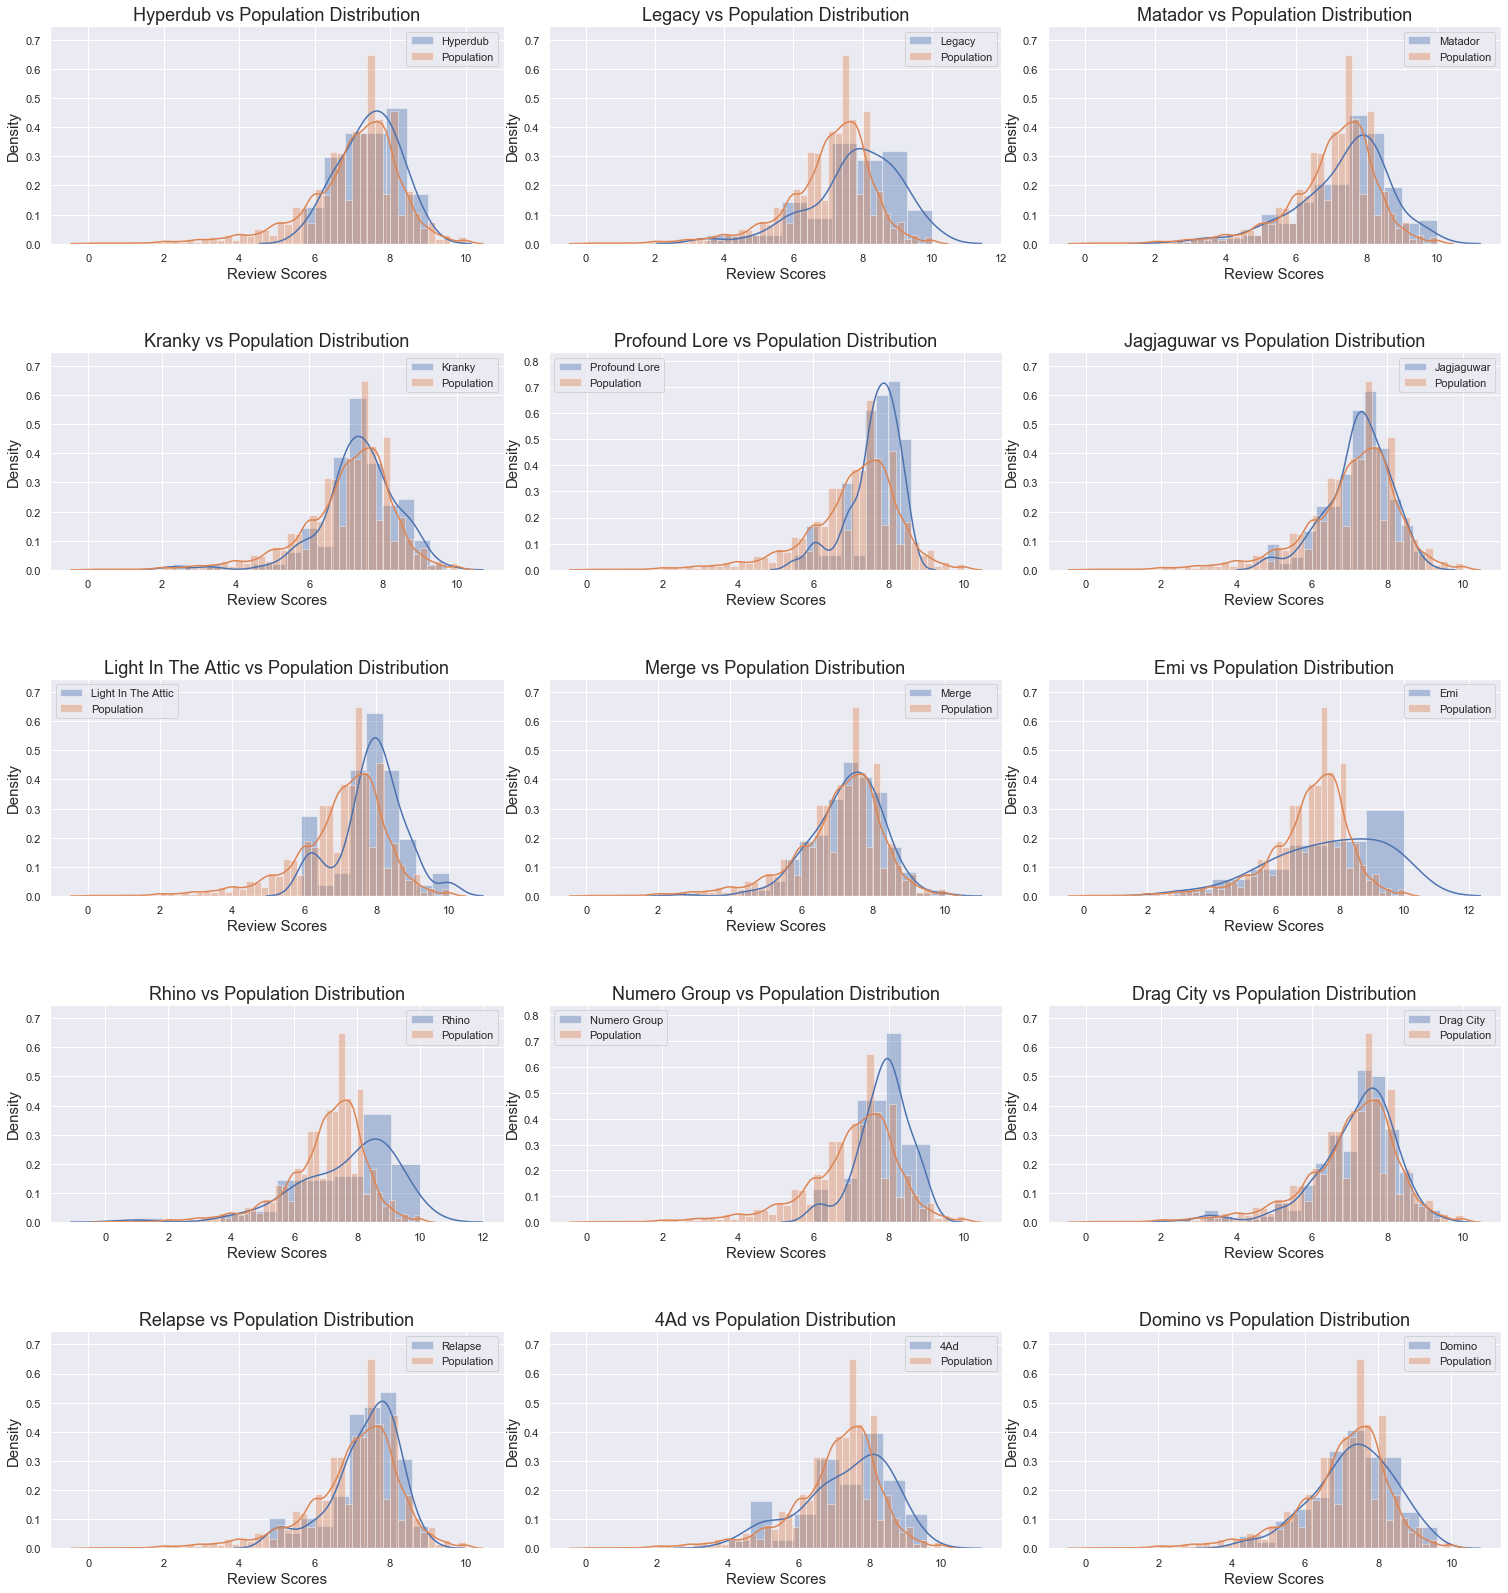

In [49]:
total = len(df)
sns.set(color_codes=True)
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(5, 3) # The grid of chart
plt.figure(figsize=(26,28)) # size of figure

for n, label in enumerate(sig_label):
    df_new = df[df['label'] == label]
    
    sns.set(color_codes=True)
    
    ax = plt.subplot(grid[n])
    sns.distplot(df_new['score'], label = f'{label}'.title()) 
    sns.distplot(df['score'], label = 'Population') 
    ax.set_title(f"{label.title()} vs Population Distribution", fontsize=18) # title label
    ax.set_xlabel('Review Scores', fontsize=15) # x axis label
    
    ax.set_ylabel('Density', size =15)
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        #ax.text(p.get_x()+p.get_width()/2.,
         #       height + 3,
          #      '{:1.2f}%'.format(height/total*100),
           #     ha="center", fontsize=14) 
    ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

    plt.legend()
    
plt.subplots_adjust(hspace= .5, wspace = 0.1)    
  
plt.show()
#plt.savefig('labels.png')

In [50]:
df_sig_label = df.loc[df['label'].isin(sig_label)]

In [51]:
label_mean = df_sig_label.groupby('label').mean()

In [52]:
label_mean = label_mean.sort_values(by = 'score', ascending = False)

## What are the Average Reviews for the Labels significantly different from the population?

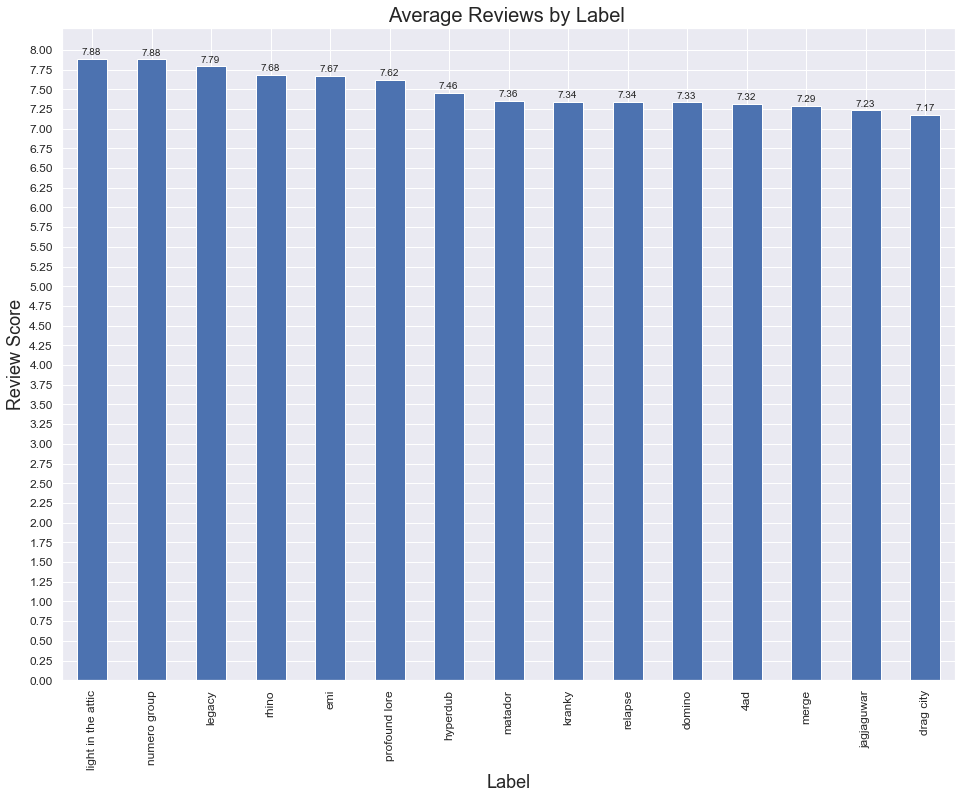

In [64]:

sns.set(style="darkgrid")
graph = label_mean['score'].plot(kind='bar', figsize = (16,12), stacked = True)
graph.set_xlabel('Label', size = 18)

graph.set_yticks(np.arange(0, 8.25 , .25))

graph.set_ylabel('Review Score', size =18)
plt.xticks(size =12)
plt.yticks(size = 12)

graph.set_title('Average Reviews by Label ', size =20)

x_offset = -.01
y_offset = 0.05
for p in graph.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    graph.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), ha="center", fontsize=10)
#plt.savefig('reviews_per_label')
plt.show()

In [54]:
genre_label_count =df_sig_label.groupby(['label', 'genre']).count()

In [55]:
genre_label_count= genre_label_count.sort_values(by='reviewid', ascending = False)

In [62]:
genre_label_count

,,Unnamed: 0,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,content
label,genre,,,,,,,,,,,,,,,
merge,rock,210,210,210,210,210,210,210,210,176,210,210,210,210,210,210
matador,rock,156,156,156,156,156,156,156,156,124,156,156,156,156,156,156
drag city,rock,142,142,142,142,142,142,142,142,112,142,142,142,142,142,142
domino,rock,133,133,133,133,133,133,133,133,113,133,133,133,133,133,133
jagjaguwar,rock,128,128,128,128,128,128,128,128,101,128,128,128,128,128,128
4ad,rock,77,77,77,77,77,77,77,77,59,77,77,77,77,77,77
kranky,rock,71,71,71,71,71,71,71,71,55,71,71,71,71,71,71
rhino,rock,55,55,55,55,55,55,55,55,50,55,55,55,55,55,55
emi,rock,53,53,53,53,53,53,53,53,43,53,53,53,53,53,53


## What is the genre breakdown of the albums ?

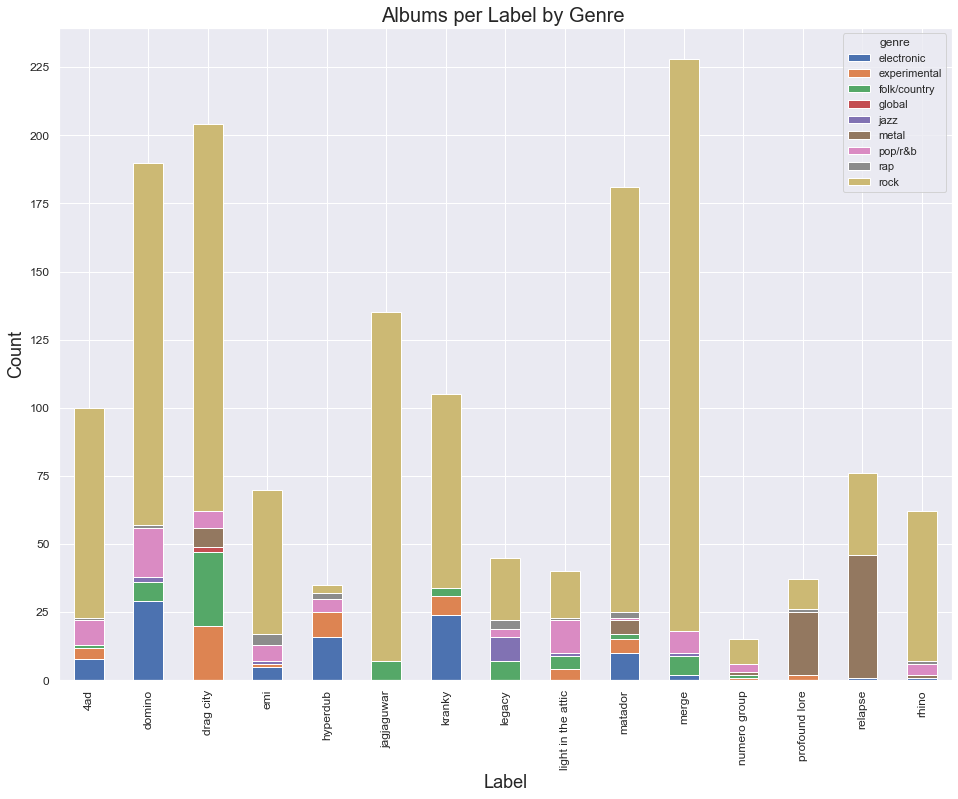

In [66]:
sns.set()
graph = genre_label_count['reviewid'].unstack().plot(kind='bar', figsize = (16,12), stacked = True, sort_columns =True)
graph.set_xlabel('Label', size = 18)

graph.set_yticks(np.arange(0, 250 , 25))

graph.set_ylabel('Count', size =18)
plt.xticks(size =12)
plt.yticks(size = 12)
graph.set_title('Albums per Label by Genre ', size =20)

x_offset = -.01
y_offset = 0.05
#for p in graph.patches:
 #   b = p.get_bbox()
  #  val = "{:.0f}".format(b.y1 + b.y0)        
   # graph.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), ha="center", fontsize=10)

#plt.savefig('label_genre_breakdown')
plt.show()